### Import Libraries

First, let's import the necessary libraries

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats

### Load the Data

In this section, we will load the dataset that we'll be analyzing. We'll use Python code to read the data into our notebook environment.

In [2]:
conn = sqlite3.connect('database.db')

query = "SELECT time, today, yesterday, same_day_last_week, avg_last_week, avg_last_month FROM checkout WHERE day = 1"

checkout_1 = pd.read_sql_query(query, conn)

conn.close()

### Know the Data

Before diving into the analysis, it's essential to get familiar with the dataset. In this section, we'll explore the dataset to understand its structure, features, and any initial insights it may offer.

In [3]:
checkout_1.describe()

,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,21.916667,21.791667,23.833333,15.482917,14.630833
std,19.410702,17.222279,17.239153,11.106122,10.366863
min,0.000000,0.000000,0.000000,0.280000,0.210000
25%,1.750000,2.500000,8.000000,4.890000,4.207500
50%,26.500000,26.500000,27.000000,18.065000,17.925000
75%,36.000000,35.250000,38.250000,25.922500,24.460000
max,55.000000,51.000000,49.000000,33.710000,28.500000


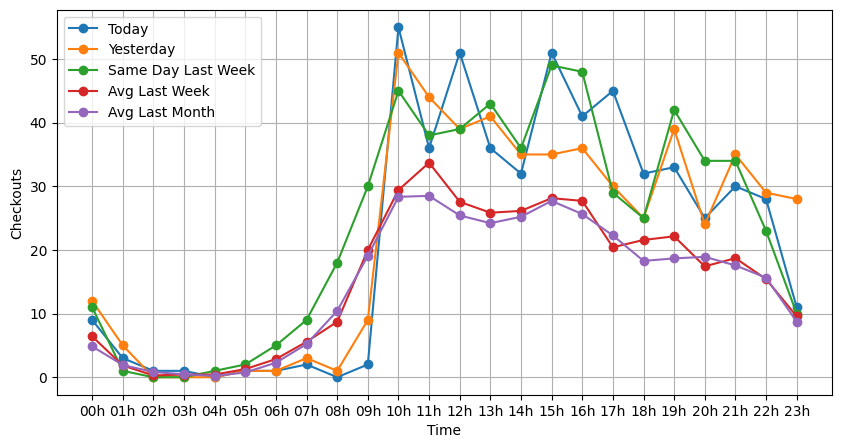

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(checkout_1['time'], checkout_1['today'], label='Today', marker='o')
plt.plot(checkout_1['time'], checkout_1['yesterday'], label='Yesterday', marker='o')
plt.plot(checkout_1['time'], checkout_1['same_day_last_week'], label='Same Day Last Week', marker='o')
plt.plot(checkout_1['time'], checkout_1['avg_last_week'], label='Avg Last Week', marker='o')
plt.plot(checkout_1['time'], checkout_1['avg_last_month'], label='Avg Last Month', marker='o')
plt.xlabel('Time')
plt.ylabel('Checkouts')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
checkout_1[['today', 'yesterday', 'same_day_last_week', 'avg_last_week', 'avg_last_month']].corr()

,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
today,1.000000,0.927136,0.878944,0.892433,0.900730
yesterday,0.927136,1.000000,0.883655,0.913277,0.900240
same_day_last_week,0.878944,0.883655,1.000000,0.958790,0.965453
avg_last_week,0.892433,0.913277,0.958790,1.000000,0.990773
avg_last_month,0.900730,0.900240,0.965453,0.990773,1.000000


### Detecting Anomalies in Sales Data

In this section, we will analyze the sales data to identify any anomalies. Given the seasonal nature of sales during different times of the day, we will compare sales values with their average to establish a baseline for anomaly detection. Since we have a small amount of data, we'll use a statistical method rather than a machine learning model.

Choosing the residual between today's value and the monthly average, as it has the highest number of samples.

In [6]:
residuals_avg_month = checkout_1['today'] - checkout_1['avg_last_month']

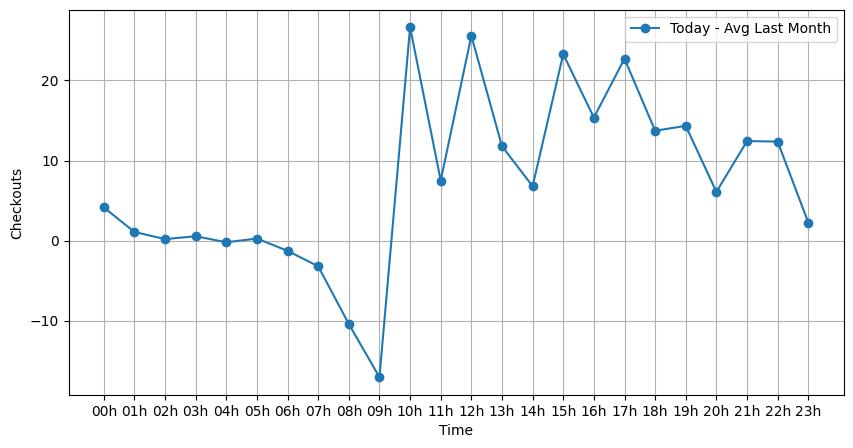

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(checkout_1['time'], residuals_avg_month, label='Today - Avg Last Month', marker='o')
plt.xlabel('Time')
plt.ylabel('Checkouts')
plt.legend()
plt.grid(True)
plt.show()

### Q-Q Plot for Normality Check

In statistical analysis, a Q-Q plot (Quantile-Quantile plot) is a graphical tool used to assess whether a dataset follows a particular distribution, such as a normal distribution. In this section, we'll create a Q-Q plot to check the normality of our sales data.


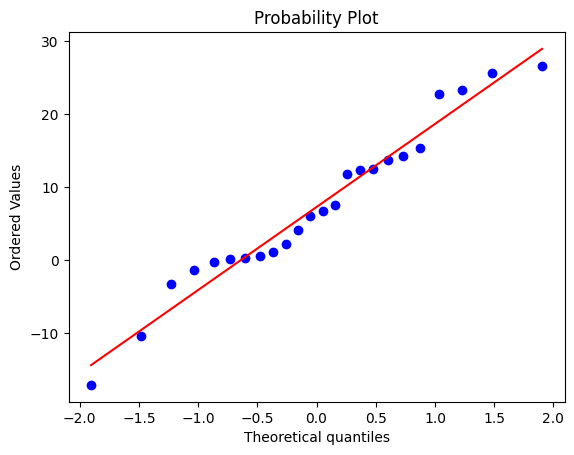

In [8]:
stats.probplot(residuals_avg_month, dist="norm", plot=plt)
plt.show()

### Non-Normality and Outlier Detection

In our analysis, the data does not approximate a normal distribution. Therefore, we will not use the z-score method for outlier detection.

In [9]:
def calculate_iqr_bounds(data, multiplier=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    return lower_bound, upper_bound

In [10]:
lower_bound, upper_bound = calculate_iqr_bounds(residuals_avg_month)

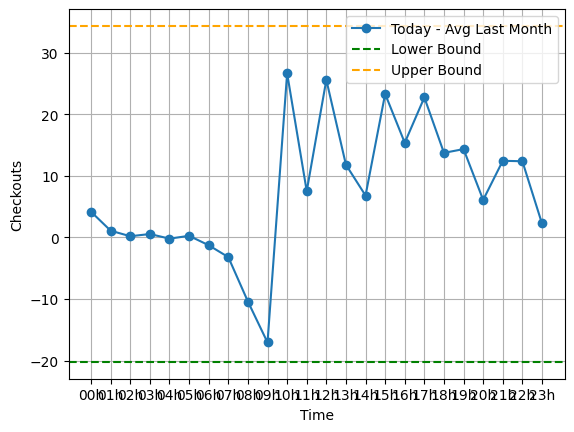

In [11]:
plt.plot(checkout_1['time'], checkout_1['today'] - checkout_1['avg_last_month'], label='Today - Avg Last Month', marker='o')
plt.axhline(y=lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='Upper Bound')
plt.xlabel('Time')
plt.ylabel('Checkouts')
plt.legend()
plt.grid(True)
plt.show()

### Checkout Day 2 
Now the same type of analyses to the second date

In [12]:
conn = sqlite3.connect('database.db')

query = "SELECT time, today, yesterday, same_day_last_week, avg_last_week, avg_last_month FROM checkout WHERE day = 2"

checkout_2 = pd.read_sql_query(query, conn)

conn.close()

In [13]:
checkout_2.describe()

,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,17.791667,21.916667,20.333333,11.936958,14.525417
std,16.699334,19.410702,15.813221,9.098644,10.384685
min,0.000000,0.000000,0.000000,0.140000,0.210000
25%,2.750000,1.750000,4.250000,2.750000,4.215000
50%,15.000000,26.500000,18.000000,12.425000,17.730000
75%,29.750000,36.000000,32.000000,19.747500,24.350000
max,46.000000,55.000000,47.000000,26.140000,28.570000


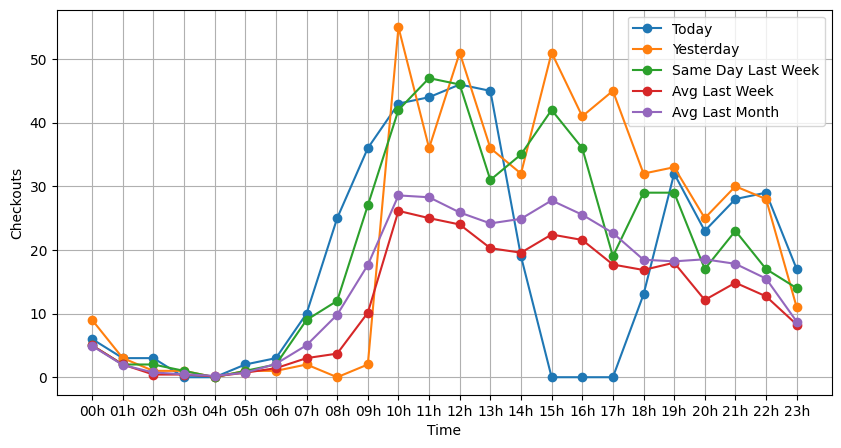

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(checkout_2['time'], checkout_2['today'], label='Today', marker='o')
plt.plot(checkout_2['time'], checkout_2['yesterday'], label='Yesterday', marker='o')
plt.plot(checkout_2['time'], checkout_2['same_day_last_week'], label='Same Day Last Week', marker='o')
plt.plot(checkout_2['time'], checkout_2['avg_last_week'], label='Avg Last Week', marker='o')
plt.plot(checkout_2['time'], checkout_2['avg_last_month'], label='Avg Last Month', marker='o')
plt.xlabel('Time')
plt.ylabel('Checkouts')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
checkout_2[['today', 'yesterday', 'same_day_last_week', 'avg_last_week', 'avg_last_month']].corr()

,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
today,1.000000,0.431044,0.633999,0.585329,0.587717
yesterday,0.431044,1.000000,0.866980,0.953627,0.914296
same_day_last_week,0.633999,0.866980,1.000000,0.963944,0.957816
avg_last_week,0.585329,0.953627,0.963944,1.000000,0.978752
avg_last_month,0.587717,0.914296,0.957816,0.978752,1.000000


Choosing the residual between today's value and the monthly average, as it has the highest number of samples.

In [16]:
residuals_avg_month_2 = checkout_2['today'] - checkout_2['avg_last_month']

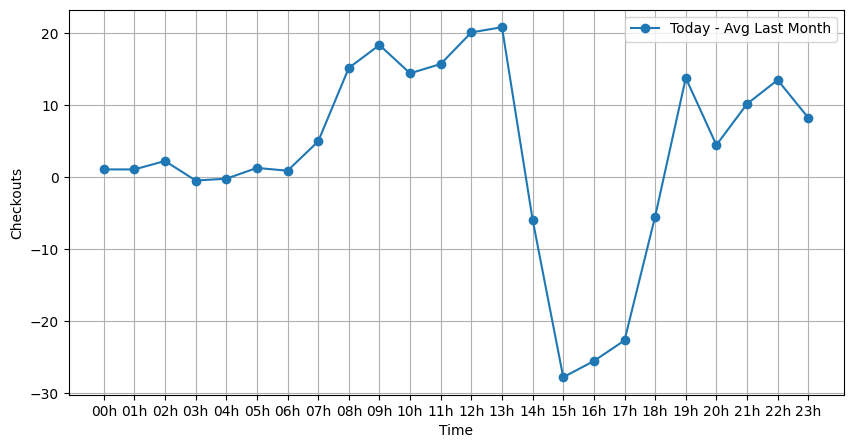

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(checkout_2['time'], residuals_avg_month_2, label='Today - Avg Last Month', marker='o')
plt.xlabel('Time')
plt.ylabel('Checkouts')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
def calculate_iqr_bounds(data, multiplier=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    return lower_bound, upper_bound

In [19]:
lower_bound_2, upper_bound_2 = calculate_iqr_bounds(residuals_avg_month_2)

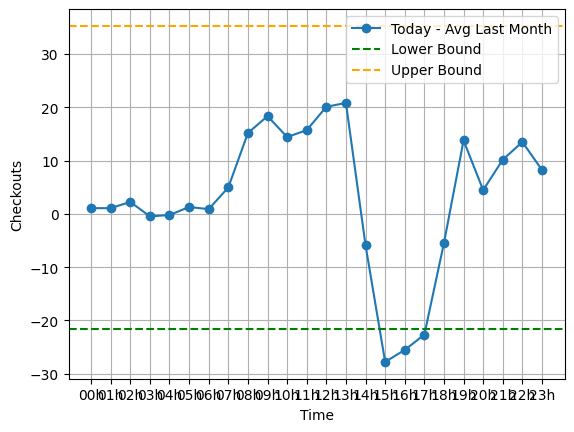

In [20]:
plt.plot(checkout_2['time'], residuals_avg_month_2, label='Today - Avg Last Month', marker='o')
plt.axhline(y=lower_bound_2, color='green', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound_2, color='orange', linestyle='--', label='Upper Bound')
plt.xlabel('Time')
plt.ylabel('Checkouts')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion: Identified Anomalies

Based on our analysis, we have identified anomalies in the sales data. Specifically, only the values at 3 PM, 4 PM, and 5 PM on the second day are considered anomalies.

### Summary of Identified Anomalies

- **Second Day, 15:00 (3 PM)**: Sales value is anomalous.
- **Second Day, 16:00 (4 PM)**: Sales value is anomalous.
- **Second Day, 17:00 (5 PM)**: Sales value is anomalous.

These time points exhibited sales values that significantly deviated from the expected patterns observed in the dataset.